### 사람 얼굴 특성 추출 p203

In [5]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
people = fetch_lfw_people(min_faces_per_person=10, resize=0.7)

In [3]:
people.target.shape, len(set(people.target_names)), people.images.shape # set 은 중복 제거

((4324,), 158, (4324, 87, 65))

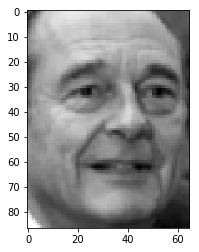

In [9]:
plt.imshow(people.images[0], cmap='gray')
plt.show()

In [11]:
# 5655(97 * 65)개의 명암을 주성분 100(10 * 10)개로 변환
from sklearn.decomposition import PCA

C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [15]:
pca = PCA(n_components=10*10, whiten=True).fit(people.data) # whiten (정규화)

In [19]:
X = pca.transform(people.data)

In [18]:
X.shape, people.data.shape

((4324, 100), (4324, 5655))

In [21]:
import numpy as np

In [25]:
img = pca.components_.reshape([100, 87, 65]) # (주성분 갯수, 높이, 너비)
img.shape

(100, 87, 65)

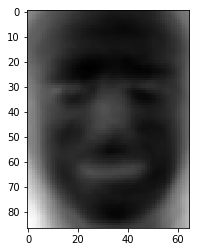

In [28]:
plt.imshow(img[0], cmap='gray')
plt.show()

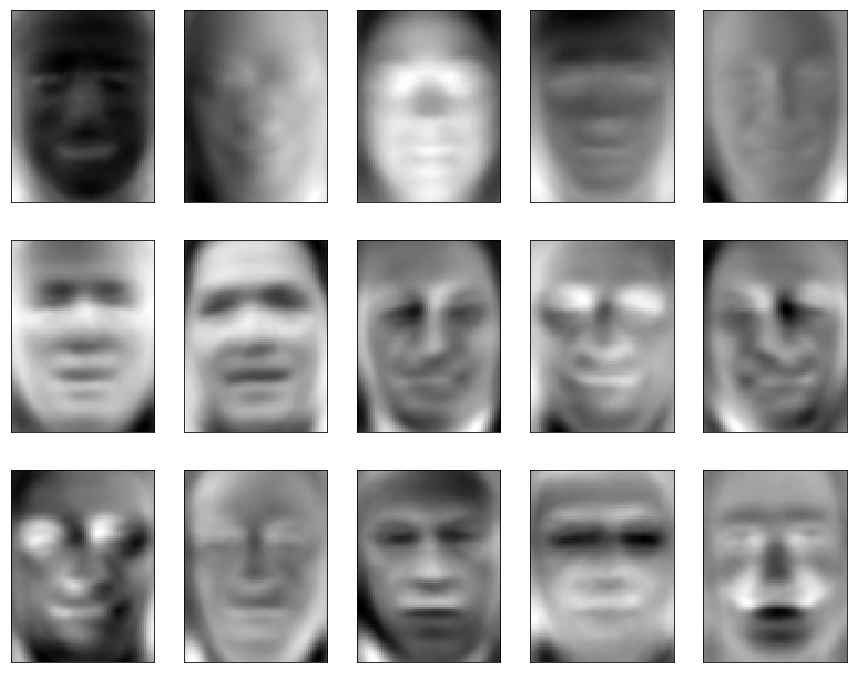

In [62]:
# 첫 주성분이 가장 중요하다고 보는 주성분이다.(주성분1)
fig, ax = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})
for r in range(3):
    for c in range(5):
        ax[r, c].imshow(img[r*5+c], cmap='gray')

In [37]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [38]:
X = people.data
y = people.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
model = RidgeClassifier(alpha=10).fit(X_train, y_train)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=4.34843e-10): result may not be accurate.
  overwrite_a=False)


In [46]:
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.14246068455134134)

In [48]:
pca = PCA(n_components=100, whiten=True).fit(people.data)
pca_x = pca.transform(people.data)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(pca_x, y)

In [59]:
model = RidgeClassifier().fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.35738513721862475, 0.2553191489361702)